In [ ]:
pip install statsmodels==0.12.1

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import sklearn.svm as ml
import sklearn
from statsmodels.tsa.seasonal import STL
from datetime import datetime
from sklearn.preprocessing import RobustScaler


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def forecast_accuracy(forecast, actual):
    mpe = np.mean((forecast - actual)/actual)   # MPE        
    return({'Mean Percentage Error':mpe})

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('FinalDataSum.csv')

In [ ]:
df.parse_dates = True
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df1 = df.set_index('Year')
df2 = df1.drop(2012, axis=0)
sum2 = df2.set_index('Date')
sum2.head()

,Details,Value (QR)
Date,,
2013-01-01,- - - Aquariums,76014
2013-01-01,- - - Drinking Straws,337764
2013-01-01,- - - Moulded Wood (Also Known As Mouldings...,394672
2013-01-01,"- - - - N,N Dimethyl-2-Aminoethanol And Thei...",2635484
2013-01-01,- - - Electric Cable Of A Cross-Section Exce...,44645826


In [ ]:
# Enter Product Name
productname="Marble, Travertine And Alabaster"
# Wheat Flour
#Marble, Travertine And Alabaster
#Tomatoes, Fresh Or Chilled
#Telephone Sets , Mobile
# Onions For Food(Green Or Dry Rind)

In [ ]:
i=sum2[sum2["Details"]==productname]
i2 = i.drop(columns=['Details'])
df = i2
df.columns=["Value"]
df.head()

,Value
Date,
2013-01-01,15506855
2013-02-01,11396043
2013-03-01,20286253
2013-04-01,21687822
2013-05-01,28192333


In [ ]:
stl = STL(df, period=12)
result = stl.fit()

In [ ]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

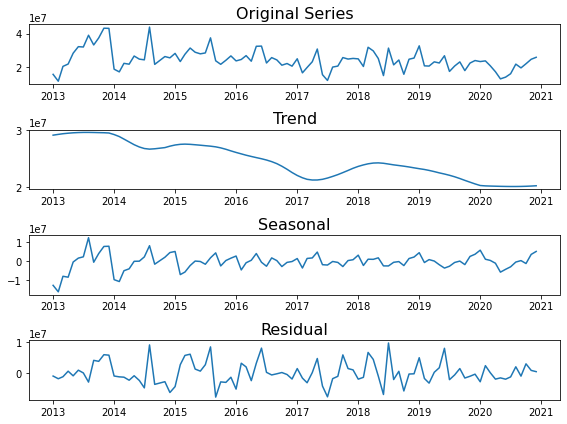

In [ ]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

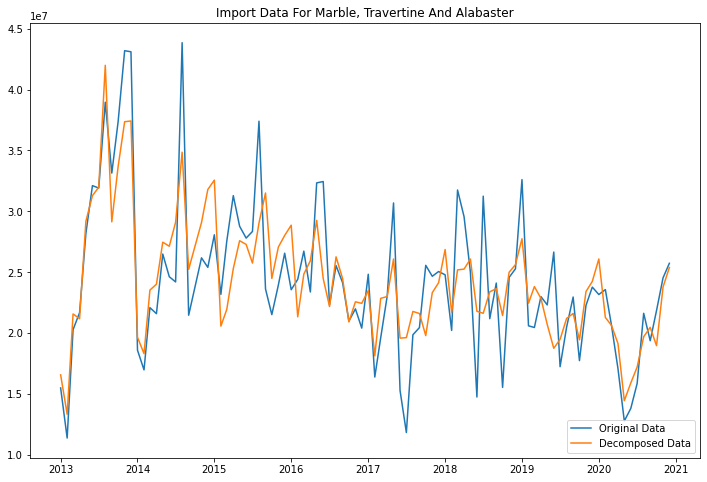

In [ ]:
i23 = "Import Data For "
imported = i23 + productname
estimated = trend + seasonal
plt.figure(figsize=(12,8))
plt.plot(df)
plt.plot(estimated)
plt.title(imported)
plt.legend(['Original Data','Decomposed Data'], loc='lower right')

In [ ]:
df = estimated
df = estimated.to_frame()
df.columns= ['Value']
df.head()

,Value
Date,
2013-01-01,1.658207e+07
2013-02-01,1.333827e+07
2013-03-01,2.157836e+07
2013-04-01,2.119105e+07
2013-05-01,2.919266e+07


Text(0.5, 1.0, 'Import Data For Marble, Travertine And Alabaster')

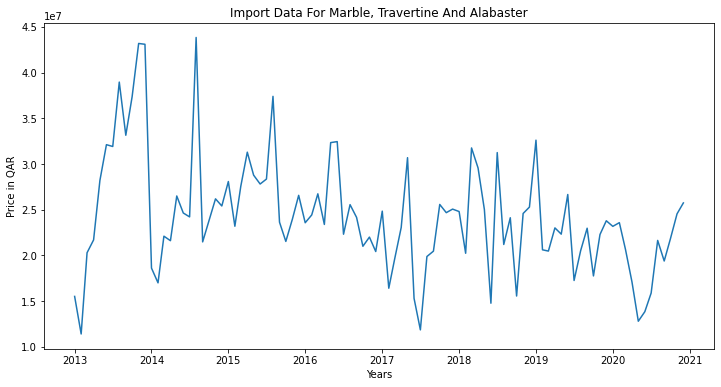

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(i2)
plt.xlabel('Years')
plt.ylabel('Price in QAR')
plt.title(imported)


In [ ]:
import statsmodels.api as sm

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
df.shape

(95, 1)

In [ ]:
data = df.filter(['Value'])

dataset = data.values

training_data_len = math.ceil(len(dataset)* .8)

training_data_len

76

In [ ]:
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(dataset)
#Robust scaling
scaled_df = df
rs=RobustScaler()
scaled_df['Value'] = rs.fit_transform(scaled_df[['Value']])
scaled_data = rs.fit_transform(dataset)
# scaled_data.shape

In [ ]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(20,len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i,0])
    if i<= 20:
      print(x_train)
      print(y_train)
      print()


[array([-1.23712832, -1.8045733 , -0.36311393, -0.43086848,  0.96887265,
        1.33493218,  1.45728787,  3.2070332 ,  0.96000178,  1.75289366,
        2.39705952,  2.40766809, -0.6972455 , -0.93262131, -0.02039128,
        0.06455576,  0.66772496,  0.6093277 ,  0.95317293,  1.95934874])]
[0.2772928370617364]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(56, 20, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences =False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1,epochs = 100)

Epoch 1/100
56/56 [==============================] - 7s 20ms/step - loss: 0.3127
Epoch 2/100
56/56 [==============================] - 1s 17ms/step - loss: 0.2613
Epoch 3/100
56/56 [==============================] - 1s 19ms/step - loss: 0.2666
Epoch 4/100
56/56 [==============================] - 1s 19ms/step - loss: 0.2588
Epoch 5/100
56/56 [==============================] - 1s 17ms/step - loss: 0.2558
Epoch 6/100
56/56 [==============================] - 1s 25ms/step - loss: 0.2553
Epoch 7/100
56/56 [==============================] - 2s 27ms/step - loss: 0.2622
Epoch 8/100
56/56 [==============================] - 2s 28ms/step - loss: 0.2534
Epoch 9/100
56/56 [==============================] - 1s 24ms/step - loss: 0.2825
Epoch 10/100
56/56 [==============================] - 1s 22ms/step - loss: 0.2730
Epoch 11/100
56/56 [==============================] - 2s 27ms/step - loss: 0.2542
Epoch 12/100
56/56 [==============================] - 1s 26ms/step - loss: 0.2474
Epoch 13/100
56/56 [=====

In [ ]:
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
  x_test.append(test_data[i-20:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
predictions = rs.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


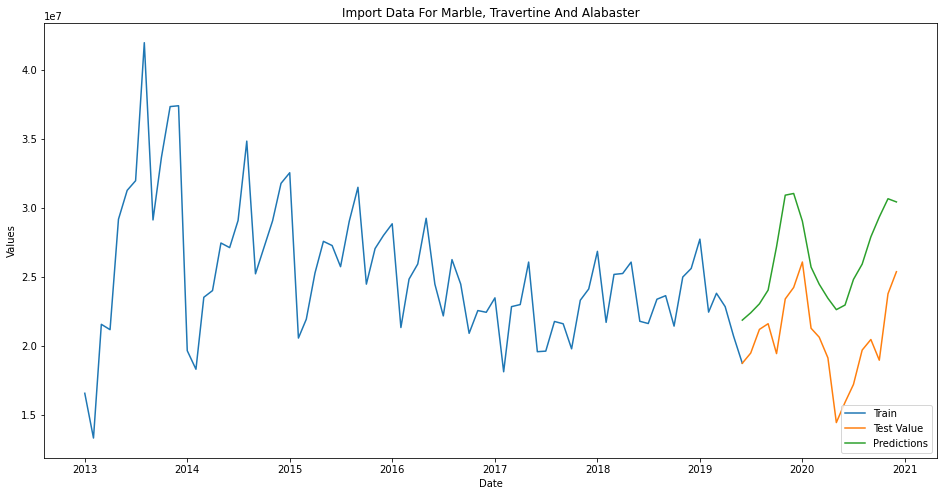

In [ ]:
lstmmodel = model
train = data[:training_data_len+1]
valid = data[training_data_len:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Values')
plt.plot(train['Value'])
plt.plot(valid[['Value', 'Predictions']])
plt.legend(['Train','Test Value','Predictions'], loc='lower right')
plt.title(imported)
plt.show()

In [ ]:
rtwoscore = str(r2_score(valid['Predictions'].values,valid['Value'].values))
scr = "R2 Score = "
r2score = scr + rtwoscore
r2score

'R2 Score = -2.7077982173761304'

In [ ]:
forecast_accuracy(valid['Value'].values,valid['Predictions'].values)

{'Mean Percentage Error': -0.2127559628362434}

In [ ]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
#ARIMA
model = sm.tsa.arima.ARIMA(df['Value'],order=(1,0,0))
arimamodel = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'Import Data For Marble, Travertine And Alabaster')

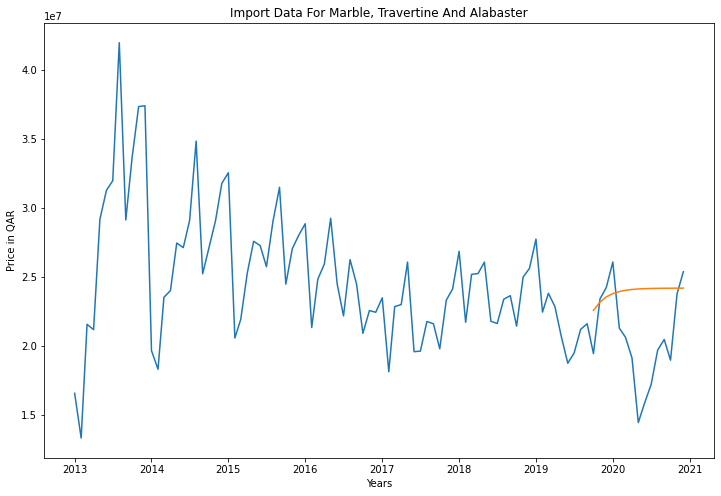

In [ ]:
# ARIMA Model
train_df = df.iloc[:80]
test_df = df.iloc[80:]
start = len(train_df)
end = len(train_df) + len(test_df) - 1
df['ARIMA Forecast']=arimamodel.predict(start,end,dynamic=True)
arima_predictions = df['ARIMA Forecast']
e1 = pd.DataFrame(rs.inverse_transform(scaled_df[['Value']]), index =scaled_df.index)
e2 = pd.DataFrame(rs.inverse_transform(scaled_df[['ARIMA Forecast']]), index = scaled_df.index)
plt.figure(figsize=(12,8))
plt.plot(e1)
plt.plot(e2)
plt.xlabel('Years')
plt.ylabel('Price in QAR')
plt.title(imported)

In [ ]:
arimadropnull = arima_predictions.dropna()
arimafinal = arimadropnull.to_frame()
originaltest = test_df['Value'].to_frame()
originaltest.shape
forecast_accuracy(arimafinal.values,originaltest.values)

{'Mean Percentage Error': -0.6387248804165526}

In [ ]:
arimadropnull = arima_predictions.dropna()
arimafinal = arimadropnull.to_frame()
accuracy = str(r2_score(test_df,arimafinal))
r2score = scr + accuracy
r2score

'R2 Score = -1.0358301044873972'

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Value'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=215.494, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=211.509, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=208.346, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=213.540, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=208.478, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=206.439, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=200.928, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=209.590, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=202.882, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=202.872, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=206.515, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=207.963, Time=0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   95
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -97.464
Date:                Thu, 31 Mar 2022   AIC                            200.928
Time:                        02:31:42   BIC                            208.557
Sample:                             0   HQIC                           204.009
                                 - 95                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5616      0.088      6.387      0.000       0.389       0.734
ma.L1         -0.9496      0.071    -13.285      0.000      -1.090      -0.809
sigma2         0.4599      0.055      8.373      0.000       0.352       0.568
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                15.33
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

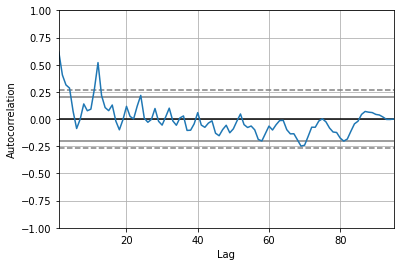

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Value'])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

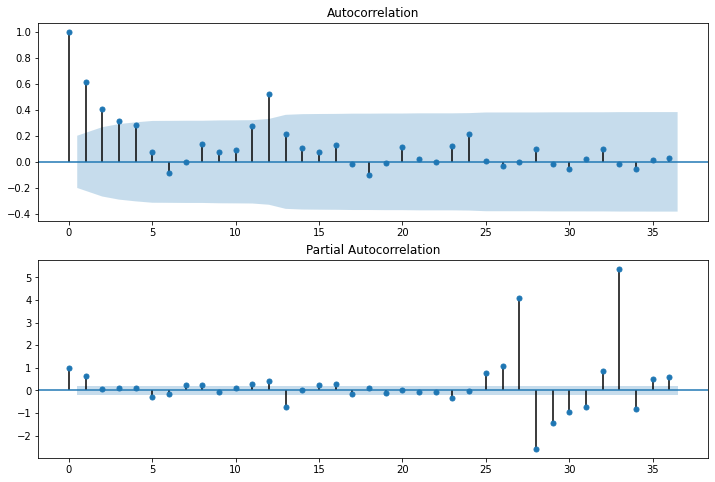

In [ ]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Value'].dropna(),lags=36,ax=ax2)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Value'].dropna(),lags=36,ax=ax1)

In [ ]:
#SARIMAX
model = sm.tsa.statespace.SARIMAX(scaled_df['Value'] ,order=(5,0,6),seasonal_order=(1,1,1,12))
sarimaxmodel = model.fit()

Text(0.5, 1.0, 'Import Data For Marble, Travertine And Alabaster')

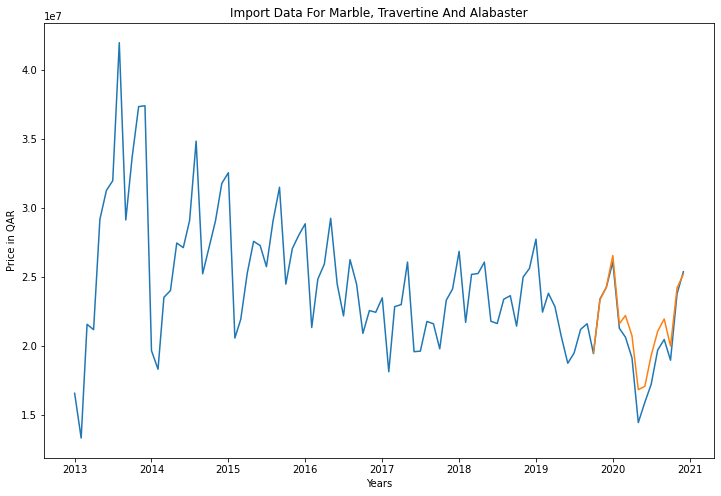

In [ ]:
# SARIMAX Model
train_df = scaled_df.iloc[:80]
test_df = scaled_df.iloc[80:]
start = len(train_df)
end = len(train_df) + len(test_df) - 1
scaled_df['SARIMAX Forecast']=sarimaxmodel.predict(start,end,dynamic=True)
value = test_df

d1 = pd.DataFrame(rs.inverse_transform(scaled_df[['Value']]), index =scaled_df.index)
d2 = pd.DataFrame(rs.inverse_transform(scaled_df[['SARIMAX Forecast']]), index = scaled_df.index)
plt.figure(figsize=(12,8))
plt.plot(d1)
plt.plot(d2)
plt.xlabel('Years')
plt.ylabel('Price in QAR')
plt.title(imported)


In [ ]:
sarimaxdropnull = scaled_df['SARIMAX Forecast'].dropna()
sarimaxfinal = sarimaxdropnull.to_frame()
originaltest = test_df['Value'].to_frame()
rscore2 = str(r2_score(originaltest.values,sarimaxfinal.values))
r2score = scr + rscore2
r2score

'R2 Score = 0.8642980968866093'

In [ ]:
forecast_accuracy(sarimaxfinal.values,originaltest.values)

{'Mean Percentage Error': 0.0385922154877466}

In [ ]:
index_future_dates=pd.date_range(start='2020-11-01', periods=8, freq='M')
pred = sarimaxmodel.predict(start=len(df),end=len(df)+7,dynamic=True).rename('SARIMAX Forecast')
pred = rs.inverse_transform([pred]).tolist()
# pred.index = index_future_dates
d4 = pd.DataFrame(pred[0], index=index_future_dates)
d4

,0
2020-11-30,2.737380e+07
2020-12-31,2.310368e+07
2021-01-31,2.094094e+07
2021-02-28,1.852805e+07
2021-03-31,1.209532e+07
2021-04-30,1.572299e+07
2021-05-31,1.728241e+07
2021-06-30,1.995733e+07


Text(0, 0.5, 'Price in QAR')

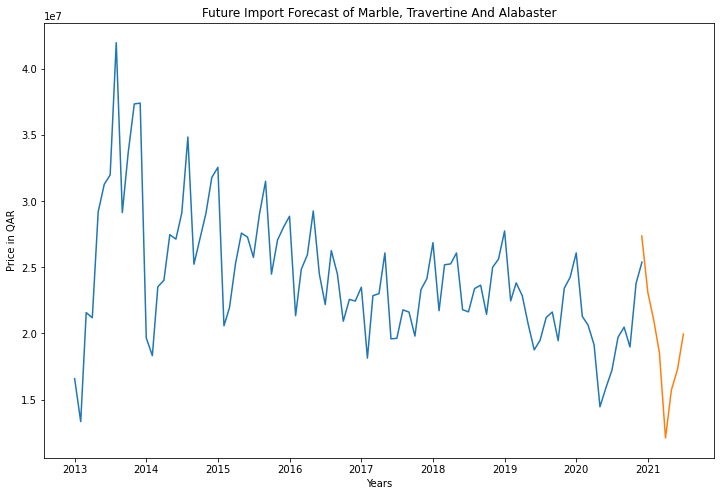

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Future Import Forecast of Marble, Travertine And Alabaster')
plt.plot(d1)
plt.plot(d4)
plt.xlabel('Years')
plt.ylabel('Price in QAR')
